# Task 4 - Prediction using Decision Tree Algorithm

## Name: Emad Magdy

### Goal: Create the Decision Tree classifier and visualize it  graphically

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to ignore any warnings
import warnings
warnings.filterwarnings("ignore")

### Loading dataset

In [3]:
# read data from file
df = pd.read_csv('Iris.csv')

### Exploring data

In [4]:
# to show the first five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# information about each column in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# all columns don't have any nan values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# shape of data 150 rows and 6 columns
df.shape

(150, 6)

In [8]:
# statistical analysis
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Cleaning data

In [9]:
# change the name of columns to become more simply
df.rename(columns={'SepalLengthCm':'SL','SepalWidthCm':'SW','PetalLengthCm':'PL','PetalWidthCm':'PW'},inplace=True)

In [10]:
# unique values in Species column
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
# change each category to numerical number
df['Species'] = df['Species'].replace({'Iris-setosa':'0','Iris-versicolor':'1','Iris-virginica':'2'})

In [12]:
# drop the column id because it has no importance
df.drop(columns=['Id'],inplace=True)

<AxesSubplot:>

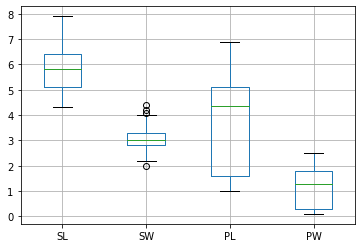

In [13]:
# to check outlier in each column
df.boxplot(column=['SL', 'SW', 'PL', 'PW'])

####  SepalWidth has outliers, so I remove them from data

In [14]:
q1=df['SW'].quantile(0.25) 
q3=df['SW'].quantile(0.75)
iqr=q3-q1
max_outlier = q3 + 1.5*iqr
min_outlier = q1 - 1.5*iqr
df = df[(df['SW'] >= min_outlier) & (df['SW'] <= max_outlier)]

In [15]:
# 4 rows are removed from data (outliers) 
df.shape

(146, 5)

### Preparing data for ML Model

In [16]:
# divide data to X(input features) and y(target)
X = df.iloc[:,:-1].values
y = df['Species'].values

### Splitting data

In [17]:
# split data to training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [18]:
# shape of X_train and x_test
print (f'The shape of X_train is: {X_train.shape}')
print (f'The shape of X_test is: {X_test.shape}')

The shape of X_train is: (116, 4)
The shape of X_test is: (30, 4)


### Training the model

In [19]:
from sklearn.tree import DecisionTreeClassifier
dec_model=DecisionTreeClassifier()
dec_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_predict = dec_model.predict(X_test)
y_predict

array(['0', '2', '0', '0', '0', '2', '0', '1', '2', '0', '0', '1', '2',
       '1', '2', '0', '1', '2', '0', '1', '2', '2', '0', '1', '0', '1',
       '1', '2', '2', '0'], dtype=object)

In [21]:
y_test

array(['0', '2', '0', '0', '0', '2', '0', '1', '1', '0', '0', '2', '2',
       '1', '2', '0', '1', '2', '0', '1', '2', '2', '0', '1', '0', '1',
       '1', '2', '2', '0'], dtype=object)

In [22]:
# check the accuracy of model
from sklearn import metrics
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_predict),2)}")

Accuracy: 0.93


### Visualizing the tree

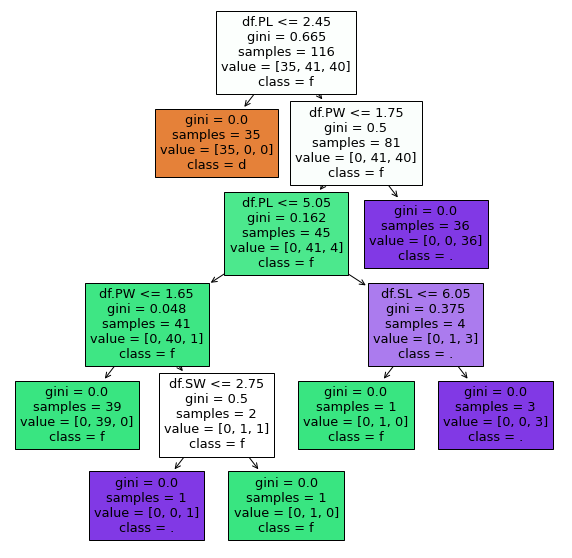

In [23]:
from sklearn.tree import plot_tree
from sklearn import tree
plt.figure(figsize=(10,10))
_ = tree.plot_tree(dec_model,
                   feature_names=('df.SL','df.SW','df.PL','df.PW'),class_names='df.Species',filled=True)